In [4]:
import numpy as np
values = np.asarray([0.0473452,0.0520401,0.0591316,0.0680199,0.0785818,0.0880537,0.096684,0.102001,0.104691,0.10819,0.109185,0.108857,0.109138,0.1098,0.111327,0.112507,0.11667,0.122013,0.123026,0.119127,0.111823,0.102832,0.0929165,0.0849752,0.0785847,0.0736237,0.072608,0.0763474,0.0838251,0.0909338,-0.376493,-1.72607,-3.86127,-6.67567,-10.053,-13.8778,-18.0397,-22.4229,-26.9437,-31.4854,-35.9625,-40.2899,-44.3868,-48.1424,-51.4924,-54.3781,-56.718,-58.4685,-59.5793,-59.971,-59.9841,-51.0547,-27.0491,7.32804,46.7509,85.4871,117.319,136.255])#,139.495,139.647,139.264,138.504,137.396,135.946,134.205,132.242,130.083,127.735,125.192,122.442,119.495,116.356,113.047,109.579,105.972,102.232,98.3781,94.4288,90.3898,86.2794,82.1115,77.898,73.6556,69.399,65.1401,60.8899,56.6665,52.485,48.3592,44.303,40.3286,36.4504,32.6844,29.0431,25.5378,22.183,18.9923,15.9796,13.1595,10.5454,8.1497,5.98632,4.0697,2.4129,1.02636,-0.0779915,-0.885704,-1.38259,-1.55523,-1.56318,-1.57049,-1.57364,-1.57149,-1.56447,-1.55264,-1.53558,-1.51364,-1.48697,-1.45576,-1.42005,-1.38032,-1.33661,-1.28956,-1.23966,-1.18661,-1.13082,-1.07253,-1.01218,-0.949785,-0.886564,-0.821959,-0.757229,-0.693475,-0.629134,-0.727095,-0.505996,-0.451758,-0.62357,-0.499736,-0.490335,-0.429626,-0.376328,-0.305097,-0.250208,-0.19891,-0.155198,-0.117826,-0.0810051,-0.0407524,-0.00286102,0.0307188,0.0573716,0.0860987,0.108481,0.12431,0.136713,0.142861,0.148551,0.149808,0.149623,0.145592,0.137924,0.127851,0.116852,0.104792,0.0938349,0.0854578,0.0795684,0.0737286,0.0691791,0.0678396,0.0682497,0.0696268,0.0708208,0.0703773,0.0677452,0.0649438,0.0628977,0.0588546,0.0524254,0.0392332,0.0393424,0.0558257,0.0566998,0.0505705,0.0470505,0.0408559,0.0321574,0.0222287,0.0135694,0.00635195,-0.000571251,-0.00778723,-0.0153208,-0.0219254,-0.0288658,-0.0364332,-0.0446949,-0.0515456,-0.0563326,-0.0598893,-0.0475788,-0.0523763,-0.059269,-0.0621257,-0.0646868,-0.0652614,-0.0650749,-0.063282,-0.0609574,-0.0572343,-0.0538054,-0.0505271,-0.0456758,-0.04319,-0.0414267,-0.0416965,-0.0413237,-0.0402694,-0.0383334,-0.0348077,-0.0317602,-0.028295,-0.0250049,-0.0221276,-0.0187302,-0.0176058,-0.0158262,-0.0140343,-0.0125446,-0.0107398])

In [5]:
from matplotlib import pyplot as plt
import numpy as np
class SimpleDmp:
    '''
    A simple Ijspeert dmp with configurable forcing term
    '''
    def __init__(self, executionTime, startPos, startVel, goalPos):
        self.T = executionTime
        self.alpha = 25.0
        self.beta = 6.25
        self.g = goalPos
        self.y = startPos
        self.z = self.T * startVel;

    def step(self, dt):
        f = 0.0
        zd = ((self.alpha * (self.beta * (self.g - self.y)- self.z)) / self.T) * dt
        yd = self.z / self.T * dt
        self.y += yd
        self.z += zd

    def run(self, dt, startT, endT):
        '''
        runs the whole dmp and returns ([ts], [ys], [yds])
        '''
        ts = []
        ys = []
        yds = []
        t = startT
        while t < endT:
            ts.append(t)
            ys.append(self.y)
            yds.append(self.z / self.T)
            t += dt
            self.step(dt)
        ts.append(t)
        ys.append(self.y)
        yds.append(self.z / self.T)

        return (ts, ys, yds)

In [6]:
%matplotlib inline
import matplotlib as mpl
import pylab
#mpl.rcParams['figure.max_open_warning'] = 999999999
from ipywidgets import StaticInteract, RangeWidget
from IPython.html.widgets import interact
pylab.rcParams['figure.figsize'] = (12.0, 6.0)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [7]:
def plotPD(g = 5.0, y_start=0.0, yd_start= 0.0):
    dt = 0.01    
    T = 1.0
    dmp = SimpleDmp(T, y_start, yd_start, g)
    (ts, ys, yds) = dmp.run(dt, 0.0, T)
    plt.plot(ts, ys)
    plt.xlim(0, 1.5)
    plt.ylim(-1.3, 6.3)
    plt.xlabel("Time")
    plt.ylabel("Position")
    plt.show()

In [8]:
def plotPDT(g = 5.0, T = 1.0):
    y_start = 0.0
    yd_start = 0.0
    dt = 0.01    
    dmp = SimpleDmp(T, y_start, yd_start, g)
    (ts, ys, yds) = dmp.run(dt, 0.0, T)
    plt.plot(ts, ys)
    plt.xlim(0, 1.5)
    plt.ylim(-1.3, 6.3)
    plt.xlabel("Time")
    plt.ylabel("Position")
    plt.show()

In [9]:
from math import sin
class SinDmp:
    '''
    A simple Ijspeert dmp with sin(t) forcing term
    '''
    def __init__(self, executionTime, startPos, startVel, goalPos, s):
        self.T = executionTime
        self.alpha = 25.0
        self.beta = 6.25
        self.g = goalPos
        self.y = startPos
        self.z = self.T * startVel;
        self.t = 0.0
        self.s = s
        self.f = sin(self.t * 10) * self.s

    def step(self, dt):
        self.f = sin(self.t * 10) * self.s
        zd = ((self.alpha * (self.beta * (self.g - self.y)- self.z) + self.f) / self.T) * dt
        yd = self.z / self.T * dt
        self.y += yd
        self.z += zd
        self.t += dt

    def run(self, dt, startT, endT):
        '''
        runs the whole dmp and returns ([ts], [ys], [yds])
        '''
        ts = []
        ys = []
        yds = []
        fs = []
        t = startT
        while t < endT:
            ts.append(t)
            ys.append(self.y)
            yds.append(self.z / self.T)
            fs.append(self.f)
            t += dt
            self.step(dt)
        ts.append(t)
        ys.append(self.y)
        yds.append(self.z / self.T)
        fs.append(self.f)

        return (ts, ys, yds, fs)

In [10]:
def plotSin(K = 1.0):
    g = 5.0
    T = 1.0
    dt = 0.01    
    y_start = 0.0
    yd_start = 0.0
    dmp = SinDmp(T, y_start, yd_start, g, K)
    (ts, ys, yds, fs) = dmp.run(dt, 0.0, T)
    plt.plot(ts, ys)
    plt.plot(ts, fs)
    plt.xlim(0, 1.5)
    plt.ylim(-0.3, 6.3)
    plt.xlabel("Time")
    plt.ylabel("Position")
    plt.legend(["dmp", "sin"])
    plt.show()

In [11]:
from math import log
class CS:
    def __init__(self, executionTime, lastPhaseValue = 0.01):
        self.T = executionTime
        self.alpha = -log(lastPhaseValue)
        self.z = 1.0 #current phase value
        self.t = 0.0#current time

    def step(self, dt):
        '''
        initially the cs is at phase 1. the first call to step will move it.
        '''
        self.z += (-self.alpha * self.z / self.T) * dt
        self.t += dt
        return self.z

    def get_phases(self, times):
        return np.exp(-self.alpha / self.T * times)

    def reset(self):
        self.z = 1.0
        self.t = 0.0

In [12]:
def plotCS(T = 1.0):
    dt = 0.01
    cs = CS(T)
    times = []
    values = []

    t = 0.0
    while(t < T):
        times.append(t)
        values.append(cs.z)
        cs.step(dt)
        t += dt
    #get value from last step
    times.append(t)
    values.append(cs.z)
    plt.plot(times, values)
    plt.xlim(-0.1, 2.0)
    plt.ylim(-0.1, 1.1)
    plt.xlabel("Time")
    plt.ylabel("Phase")
    plt.show()

In [13]:
from math import sin
class SinDmpWithCS:
    '''
    A simple Ijspeert dmp with sin(t) forcing term
    '''
    def __init__(self, executionTime, startPos, startVel, goalPos, s):
        self.T = executionTime
        self.alpha = 25.0
        self.beta = 6.25
        self.g = goalPos
        self.y = startPos
        self.z = self.T * startVel;
        self.t = 0.0
        self.s = s
        self.cs = CS(executionTime)

    def step(self, dt):
        f = sin(self.t * 10) * self.s
        phase = self.cs.step(dt)
        f *= phase
        zd = ((self.alpha * (self.beta * (self.g - self.y)- self.z) + f) / self.T) * dt
        yd = self.z / self.T * dt
        self.y += yd
        self.z += zd
        self.t += dt

    def run(self, dt, startT, endT):
        '''
        runs the whole dmp and returns ([ts], [ys], [yds])
        '''
        ts = []
        ys = []
        yds = []
        t = startT
        while t < endT:
            ts.append(t)
            ys.append(self.y)
            yds.append(self.z / self.T)
            t += dt
            self.step(dt)
        ts.append(t)
        ys.append(self.y)
        yds.append(self.z / self.T)

        return (ts, ys, yds)

In [14]:
def plotSinCS(sin_scale = 1.0, T = 1.0, g=5.0):
    dt = 0.01    
    y_start = 0.0
    yd_start = 0.0
    s = sin_scale
    dmp = SinDmpWithCS(T, y_start, yd_start, g, s)
    (ts, ys, yds) = dmp.run(dt, 0.0, T)
    plt.plot(ts, ys)
    plt.xlim(0, 1.5)
    plt.ylim(-0.3, 6.3)
    plt.xlabel("Time")
    plt.ylabel("Position")
    plt.show()

In [15]:
from math import sin
class SinDmpWithCS2:
    '''
    A simple Ijspeert dmp with sin(z) forcing term
    '''
    def __init__(self, executionTime, startPos, startVel, goalPos, s):
        self.T = executionTime
        self.alpha = 25.0
        self.beta = 6.25
        self.g = goalPos
        self.y = startPos
        self.z = self.T * startVel;
        self.s = s
        self.cs = CS(executionTime)

    def step(self, dt):
        phase = self.cs.step(dt)
        f = sin((1.0 - phase) * 10) * self.s
        f *= phase
        zd = ((self.alpha * (self.beta * (self.g - self.y)- self.z) + f) / self.T) * dt
        yd = self.z / self.T * dt
        self.y += yd
        self.z += zd

    def run(self, dt, startT, endT):
        '''
        runs the whole dmp and returns ([ts], [ys], [yds])
        '''
        ts = []
        ys = []
        yds = []
        t = startT
        while t < endT:
            ts.append(t)
            ys.append(self.y)
            yds.append(self.z / self.T)
            t += dt
            self.step(dt)
        ts.append(t)
        ys.append(self.y)
        yds.append(self.z / self.T)

        return (ts, ys, yds)

In [16]:
def plotSinCS2(sin_scale = 1.0, T = 1.0, g=5.0):
    dt = 0.01    
    y_start = 0.0
    yd_start = 0.0
    s = sin_scale
    dmp = SinDmpWithCS2(T, y_start, yd_start, g, s)
    (ts, ys, yds) = dmp.run(dt, 0.0, T)
    plt.plot(ts, ys)
    plt.xlim(0, 1.5)
    plt.ylim(-0.3, 6.3)
    plt.xlabel("Time")
    plt.ylabel("Position")
    plt.show()

In [17]:
class Rbf:
    '''
    A simple radial basis function approximator
    '''
    def __init__(self, cs, executionTime, numWeights = 30, overlap = 0.1):
        '''
        The cs is only needed to spread the centers.
        ExecutionTime is only needed to spread the centers. needs to be the original executionTime the the weights have been learned with
        '''
        self.numWeights = numWeights
        self.cs = cs
        self.executionTime = executionTime
        #evenly spread the centers throughout the execution time
        centers_in_time = np.linspace(start=0.0, stop=executionTime, num=numWeights)
        #and move them to phase space
        self.centers = np.exp(-cs.alpha / executionTime * centers_in_time)
        self.weights = np.zeros_like(self.centers)

        #set the widths of each rbf according to overlap
        self.widths = np.ndarray(numWeights)
        log_overlap = -log(overlap)
        for i in range(1, numWeights):
            self.widths[i - 1] = log_overlap / ((self.centers[i] - self.centers[i - 1])**2)
        self.widths[numWeights - 1] = self.widths[numWeights - 2];


    def set_weights(self, weights):
        assert(len(weights) == self.numWeights)
        self.weights = weights

    def evaluate(self, z):
        psi = np.exp(-self.widths * (z - self.centers)**2)
        nom = np.dot(self.weights, psi) * z
        denom = np.sum(psi)
        return nom / denom

    def plot_gaussians(self):
        points_in_time = np.linspace(0.0, executionTime * 1.3, num=600)
        points_in_phase = self.cs.get_phases(points_in_time)
        for i in range(self.numWeights):#for each guassian
            values = np.exp(-self.widths[i] * (points_in_phase - self.centers[i])**2)
            plt.plot(points_in_phase, values)
            plt.plot(points_in_time, values)

    def plot_function(self):
        points_in_time = np.linspace(0.0, executionTime * 1.3, num=600)
        points_in_phase = self.cs.get_phases(points_in_time)
        values = []
        for z in points_in_phase:
            values.append(self.evaluate(z))
        plt.plot(points_in_time, values)

    def psi(self, i, phases):
        '''
        evaluates the i'th gaussian at the specified phases and returns the results as vector
        '''
        assert(i < self.numWeights)
        assert(i >= 0)
        return np.exp(-self.widths[i] * (phases - self.centers[i])**2)

In [18]:
class DmpWithImitation:
    '''
    A simple Ijspeert dmp with forcing term
    '''
    def __init__(self, executionTime, startPos, startVel, goalPos, cs, numWeights, overlap):
        self.T = executionTime
        self.cs = cs
        self.alpha = 25.0
        self.beta = 6.25
        self.g = goalPos
        self.y = startPos
        self.startPos = startPos
        self.z = self.T * startVel;
        self.startZ = self.z
        self.rbf = Rbf(cs, executionTime, numWeights, overlap)

    def step(self, dt):
        z = self.cs.step(dt)
        f = self.rbf.evaluate(z)
            
        zd = ((self.alpha * (self.beta * (self.g - self.y)- self.z) + f) / self.T) * dt
        yd = self.z / self.T * dt
        self.y += yd
        self.z += zd

    def imitate(self, times, positions, dt):
        '''
        first position at t=0 and last position at t = executionTime
        dt = sampling dt
        '''
        velocities = np.gradient(positions, dt)
        accelerations = np.gradient(velocities, dt)
        goal = positions[len(positions) - 1]
        references = self.T**2 * accelerations - self.alpha * (self.beta * (goal - positions) - self.T * velocities)
        phases = self.cs.get_phases(times)
        weights = np.ndarray(self.rbf.numWeights)
        for i in range(self.rbf.numWeights):
            psi = self.rbf.psi(i, phases)
            psiD = np.diag(psi)
            weights[i] = np.linalg.inv([[np.dot(phases.T, np.dot(psiD, phases))]]) * np.dot(phases.T, np.dot(psiD, references))
        self.rbf.set_weights(weights)


    def run(self, dt, startTime = 0.0, endTime = None):
        '''
        runs the whole dmp and returns ([ts], [ys], [yds])
        '''
        ts = []
        ys = []
        yds = []
        t = startTime
        if endTime is None:
            endTime = self.T
        while t < endTime:
            ts.append(t)
            ys.append(self.y)
            yds.append(self.z / self.T)
            t += dt
            self.step(dt)
        ts.append(t)
        ys.append(self.y)
        yds.append(self.z / self.T)
        return (ts, ys, yds)

    def reset(self, cs, goal, executionTime, start):
        self.cs = cs
        self.g = goal
        self.T = executionTime
        self.y = start
        self.z = self.startZ

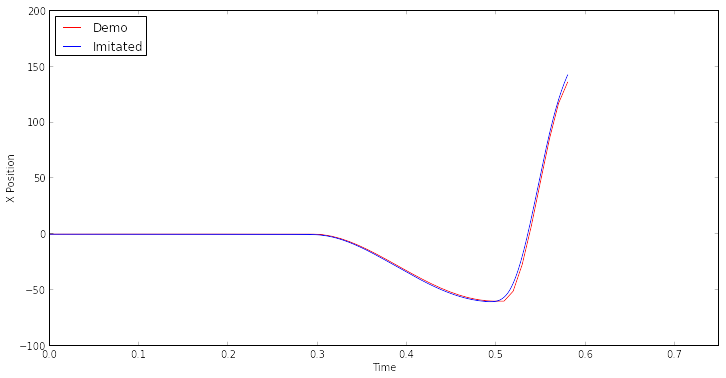

<function __main__.plotImitateDmp>

In [19]:
def plotImitateDmp(g=values[-1], T=0.01 * len(values), y0=values[0]):
    dt = 0.01
    executionTime = dt * len(values)

    lastPhaseValue = 0.1
    numWeights = 100
    overlap = 0.2
    endTime = executionTime
    times, step = np.linspace(start=0.0, stop=executionTime, num = len(values), retstep=True)
    endPos = values[-1]


    cs = CS(executionTime, lastPhaseValue)
    dmp = DmpWithImitation(executionTime, values[0], (values[1] - values[0]) / dt, values[len(values) - 1], cs, numWeights, overlap)
    dmp.imitate(times, values, dt)
    
    cs2 = CS(T, lastPhaseValue)
    dmp.reset(cs2, g, T, y0)
    (ts, ys, yds) = dmp.run(0.001)

    plt.plot(times, values,"r")
    plt.plot(ts, ys)
    plt.legend(["Demo", "Imitated"], loc="upper left")
    plt.xlabel("Time")
    plt.ylabel("X Position")
    plt.xlim(0.0, 0.75)
    plt.ylim(-100, 200)
    plt.show()
    
interact(plotImitateDmp, g=(-10, 200, 1), T=(0.1, 1.5, 0.1), y0=(-30, 30, 1))

In [20]:
class DmpWithImitationScale:
    '''
    A simple Ijspeert dmp with forcing term
    '''
    def __init__(self, executionTime, startPos, startVel, goalPos, cs, numWeights, overlap):
        self.T = executionTime
        self.cs = cs
        self.alpha = 25.0
        self.beta = 6.25
        self.g = goalPos
        self.y = startPos
        self.startPos = startPos
        self.z = self.T * startVel;
        self.startZ = self.z
        self.rbf = Rbf(cs, executionTime, numWeights, overlap)
        self.amplitude = 0

    def step(self, dt):
        z = self.cs.step(dt)
        f = self.rbf.evaluate(z) * (self.g - self.startPos) / self.amplitude
            
        zd = ((self.alpha * (self.beta * (self.g - self.y)- self.z) + f) / self.T) * dt
        yd = self.z / self.T * dt
        self.y += yd
        self.z += zd

    def imitate(self, times, positions, dt):
        '''
        first position at t=0 and last position at t = executionTime
        dt = sampling dt
        '''
        self.amplitude = positions[-1] - positions[0]
        velocities = np.gradient(positions, dt)
        accelerations = np.gradient(velocities, dt)
        goal = positions[len(positions) - 1]
        references = self.T**2 * accelerations - self.alpha * (self.beta * (goal - positions) - self.T * velocities)
        phases = self.cs.get_phases(times)
        weights = np.ndarray(self.rbf.numWeights)
        for i in range(self.rbf.numWeights):
            psi = self.rbf.psi(i, phases)
            psiD = np.diag(psi)
            weights[i] = np.linalg.inv([[np.dot(phases.T, np.dot(psiD, phases))]]) * np.dot(phases.T, np.dot(psiD, references))
        self.rbf.set_weights(weights)


    def run(self, dt, startTime = 0.0, endTime = None):
        '''
        runs the whole dmp and returns ([ts], [ys], [yds])
        '''
        ts = []
        ys = []
        yds = []
        t = startTime
        if endTime is None:
            endTime = self.T
        while t < endTime:
            ts.append(t)
            ys.append(self.y)
            yds.append(self.z / self.T)
            t += dt
            self.step(dt)
        ts.append(t)
        ys.append(self.y)
        yds.append(self.z / self.T)
        return (ts, ys, yds)

    def reset(self, cs, goal, executionTime, start):
        self.cs = cs
        self.g = goal
        self.T = executionTime
        self.y = start
        self.z = self.startZ

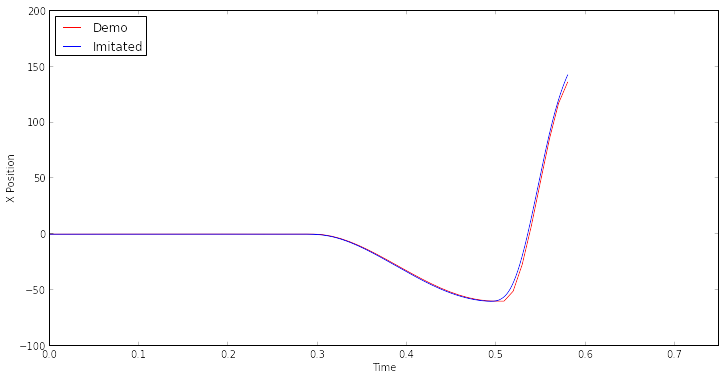

<function __main__.plotImitateScaleDmp>

In [21]:
def plotImitateScaleDmp(g=values[-1], T=0.01 * len(values), y0=values[0]):
    dt = 0.01
    executionTime = dt * len(values)

    lastPhaseValue = 0.1
    numWeights = 100
    overlap = 0.2
    endTime = executionTime
    times, step = np.linspace(start=0.0, stop=executionTime, num = len(values), retstep=True)
    endPos = values[-1]


    cs = CS(executionTime, lastPhaseValue)
    dmp = DmpWithImitationScale(executionTime, values[0], (values[1] - values[0]) / dt, values[len(values) - 1], cs, numWeights, overlap)
    dmp.scale = True
    dmp.imitate(times, values, dt)
    
    cs2 = CS(T, lastPhaseValue)
    dmp.reset(cs2, g, T, y0)
    (ts, ys, yds) = dmp.run(0.001)

    plt.plot(times, values,"r")
    plt.plot(ts, ys)
    plt.legend(["Demo", "Imitated"], loc="upper left")
    plt.xlabel("Time")
    plt.ylabel("X Position")
    plt.xlim(0.0, 0.75)
    plt.ylim(-100, 200)
    plt.show()
    
interact(plotImitateScaleDmp, g=(-10, 200, 1), T=(0.1, 1.5, 0.1), y0=(-30, 30, 1))


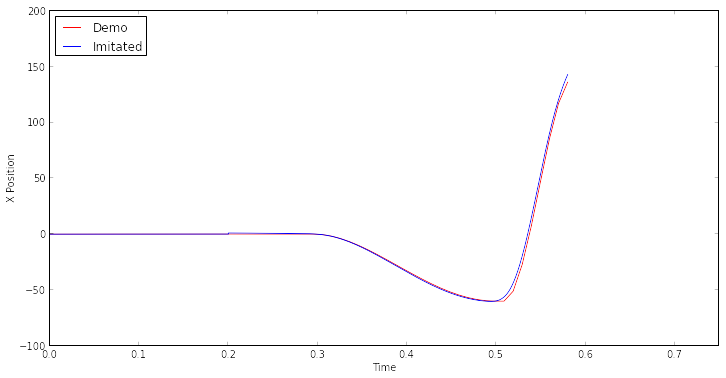

<function __main__.plotPerturbateDmp>

In [22]:
def plotPerturbateDmp(p_loc=0.2, p_strength=1.0):
    dt = 0.01
    executionTime = dt * len(values)

    lastPhaseValue = 0.1
    numWeights = 100
    overlap = 0.2
    endTime = executionTime
    times, step = np.linspace(start=0.0, stop=executionTime, num = len(values), retstep=True)
    endPos = values[-1]


    cs = CS(executionTime, lastPhaseValue)
    dmp = DmpWithImitation(executionTime, values[0], (values[1] - values[0]) / dt, values[len(values) - 1], cs, numWeights, overlap)
    dmp.imitate(times, values, dt)
    
    (ts, ys, _) = dmp.run(0.001, endTime=p_loc)
    dmp.y += p_strength
    (ts2, ys2, _) = dmp.run(0.001, startTime=p_loc)
    ts.extend(ts2)
    ys.extend(ys2)
    plt.plot(times, values,"r")
    plt.plot(ts, ys)
    plt.legend(["Demo", "Imitated"], loc="upper left")
    plt.xlabel("Time")
    plt.ylabel("X Position")
    plt.xlim(0.0, 0.75)
    plt.ylim(-100, 200)
    plt.show()
    
interact(plotPerturbateDmp, p_loc=(0.01, 0.5, 0.01), p_strength=(-200, 200, 1))

In [23]:
%%html
<style>
table,td,tr,th {border:none!important}
</style>

#Introduction to Discrete Dynamic Movement Primitives
  
  

### Arne Böckmann 

##What are DMPs
<table>
  <tr>
    <td>
    <ul style="list-style-type:disc">
        <li>Dynamical systems</li>
        <li>Represent goal directed movements in joint or task space </li>
        <li>Guaranteed to converge to the goal</li>
        <li>Scale spatial and temporal</li>
        <li>Robust against pertubations</li>
        <li>Adaptable online</li>
        <li>Extendable</li>
        <li>Learnable from demonstration</li>
    </ul>
    </td>
    <td><img src="dmp.png"></td>
  </tr>
</table>



##Basic Idea

* Use well understood stable dynamical system with convenient properties
* Add nonlinear terms to achieve the desired movement behavior


##Damped Spring Model
\begin{align}
\dot{z} &= \alpha_z(\beta_z(g-y)-z)\\
\dot{y} &= z
\end{align}

$y$ - position, $g$ - goal position

$\alpha_z$, $\beta_z$ - Dampening constants. Use $\beta_z = \alpha_z/4$ for critical dampening.


##Damped Spring Model
Difference Equations
\begin{align}
z_t &= z_{t-1} + \alpha_z(\beta_z(g-y_{t-1})-z_{t-1}) * \Delta t\\
y_t &= y_{t-1} + z_{t-1} * \Delta t
\end{align}

##Damped Spring Model (Demo)

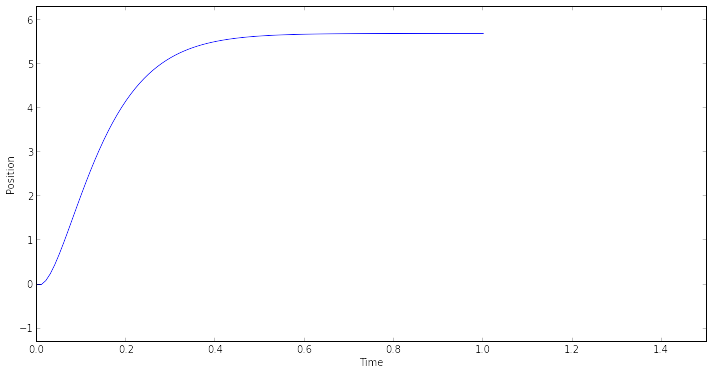

In [24]:
interact(plotPD, g=(-2.0, 6.0, 0.1), y_start=(-1.0, 2.0, 0.1), yd_start=(-50.0, 50.0, 5.0))     

### Adding temporal scaling
* Add temporal scaling factor $\color{red}\tau$
\begin{align}
\color{red}\tau\dot{z} &= \alpha_z(\beta_z(g-y)-z)\\
\color{red}\tau\dot{y} &= z\\\\
z_t &= z_{t-1} + \frac{\alpha_z(\beta_z(g-y_{t-1})-z_{t-1}) * \Delta t}{\color{red}\tau}\\
y_t &= y_{t-1} + \frac{z_{t-1} * \Delta t}{\color{red}\tau}
\end{align}


### Adding temporal scaling (Demo)

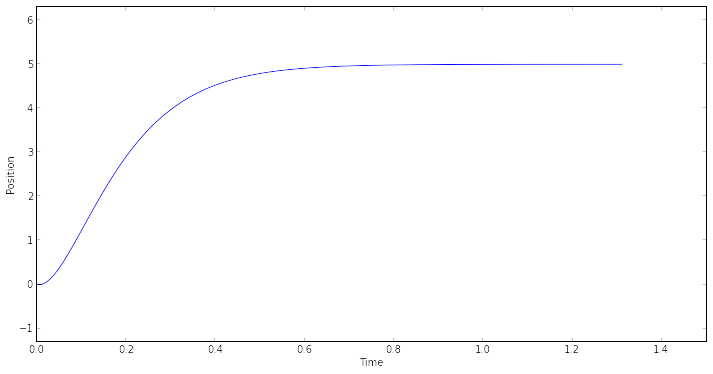

In [25]:
interact(plotPDT, g=(-2.0, 6.0, 0.1), T=(0.01, 1.5, 0.1))     

##Shaping the Trajectory (The Transformation System)
Introduce the forcing term $\color{red}f$
\begin{align}
z_t &= z_{t-1} + \frac{\alpha_z(\beta_z(g-y_{t-1})-z_{t-1} + \color{red}f) * \Delta t}{\tau}\\
\end{align}
* 'forces' the system into a certain shape.
* could be a function of time: $f(t)$

###Shaping the Trajectory (Demo)
* set $f(t) = K * sin(t)$

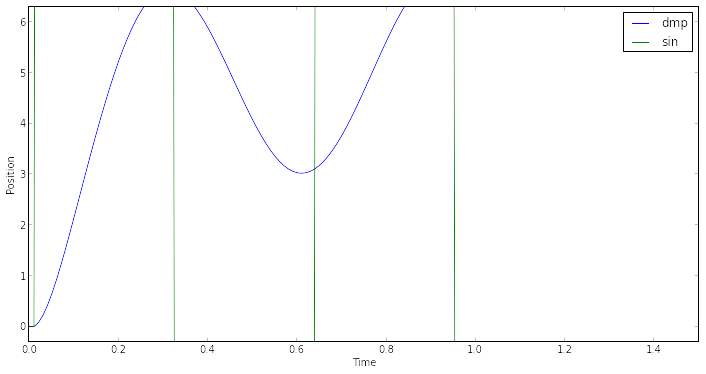

In [26]:
interact(plotSin, K=(0.1, 1000.0, 0.1))

##Restoring Goal Convergence
* Influence of $f$ should diminish over time
* Introducing the phase $\color{red}s$
\begin{align}
z_t &= z_{t-1} + \frac{\alpha_z(\beta_z(g-y_{t-1})-z_{t-1} + \color{red}sf) * \Delta t}{\tau}\\
\end{align}

* $\color{red}s$ starts at 1 and exponentially decays to 0

##Restoring Goal Convergence (The Canonical System)
$s$ can be generated by the following system:
\begin{align}
\tau \dot{s} = -\alpha_s s\\\\
s_t = s_{t-1} + \frac{-\alpha_s \Delta t}{T}
\end{align}
* $\alpha_s$ defines how fast the system decays.


##Canonical System (Demo)

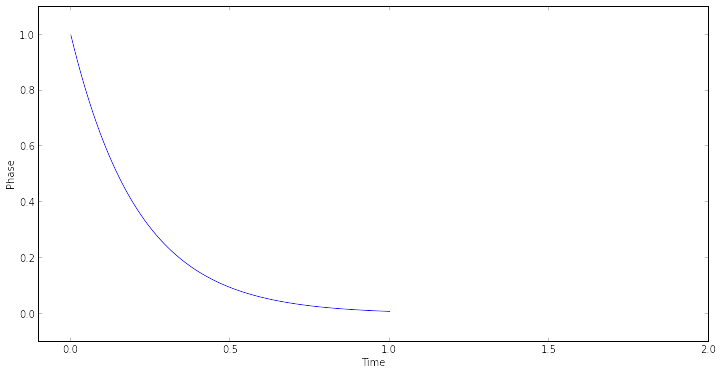

<function __main__.plotCS>

In [27]:
interact(plotCS, T=(0.1, 2.0))

##Sin Forcing Term and Canonical System (Demo)

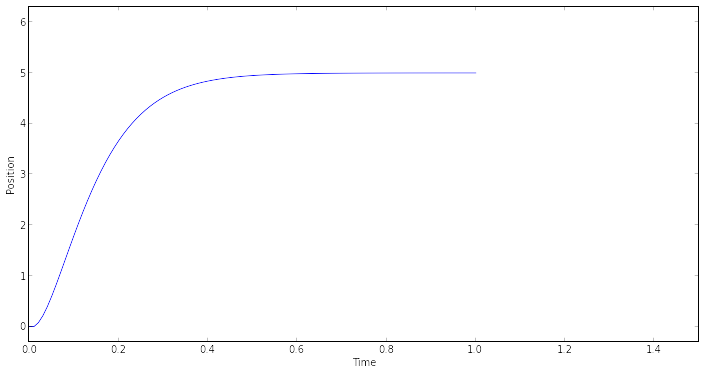

<function __main__.plotSinCS>

In [28]:
interact(plotSinCS, sin_scale=(-1000, 1000, 1.0), T=(0.1, 1.5, 0.1), g=(0.0, 6.0, 0.1))

##Restoring Temporal Scaling
 * Because $f$ is time dependent
 * Solution: Replace the time dependency with a phase dependency
 * $f = f(s)$

##Restoring Temporal Scaling (Demo)

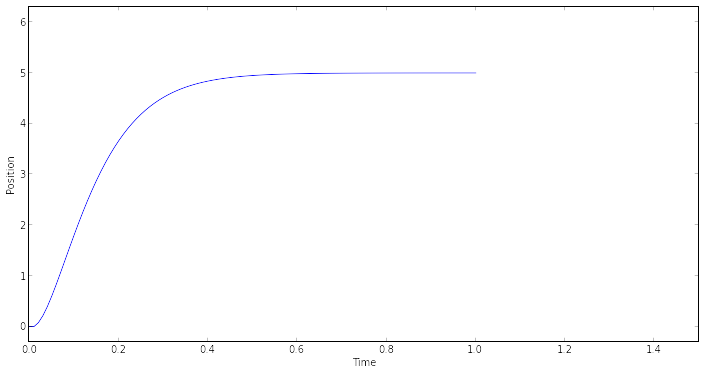

<function __main__.plotSinCS2>

In [29]:
interact(plotSinCS2, sin_scale=(-1000, 1000, 1.0), T=(0.1, 1.5, 0.1), g=(0.0, 6.0, 0.1))

##Imitating arbitrary Trajectories
* Set $f(s) = \frac{\sum_{i=1}^N \psi_i(s)w_i}{\sum_{i=1}^N \psi_i(s)}$
 * $\psi_i$ are fixed basis functions (e.g. radial basis functions)
 * $N$ is the number of basis functions/weights
 * $f$ can be shaped by adjusting the $w_i$
 * $f$ can imitate any given trajectory using locally weighted regression (not part of this talk)

####Imitating arbitrary Trajectories
This is a part of B-Human's current kick trajectory

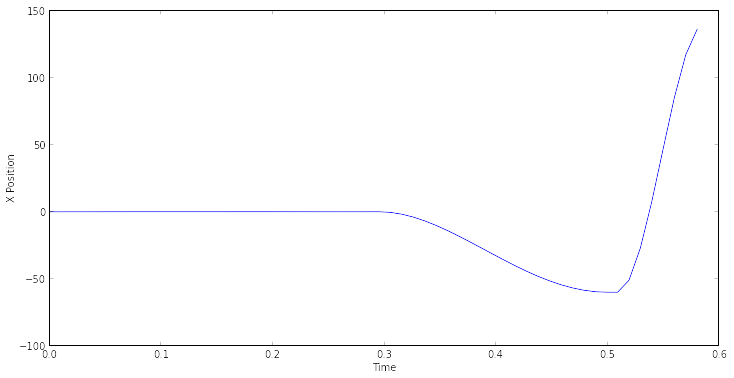

In [30]:
plt.plot(np.linspace(start=0.0, stop=0.01 * len(values), num = len(values)), values); plt.xlabel("Time"); plt.ylabel("X Position")

##Imitating arbitrary Trajectories (Demo)

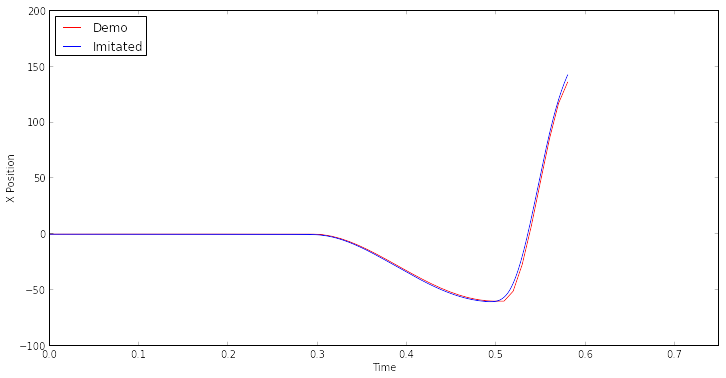

<function __main__.plotImitateDmp>

In [31]:
interact(plotImitateDmp, g=(-10, 200, 1), T=(0.1, 1.5, 0.1), y0=(-30, 30, 1))

##Adding Spatial Scaling
* $w_i$ are learned for one specific goal position
 * Are too strong/weak for other goal positions
* Solution: Scale the forcing term according to the difference $\color{red}d$ between the original trajectory and the modified one
\begin{align}
\color{red}d &= (y_e - y_0)/(y_{de} - y_{d0})\\
z_t &= z_{t-1} + \frac{\alpha_z(\beta_z(g-y_{t-1})-z_{t-1} + \color{red}dsf) * \Delta t}{\tau}\\
\end{align}

   * $y_{de}$ and $y_{d0}$ - End and start position of the demonstrated trajectory

##Spatial Scaling (Demo)

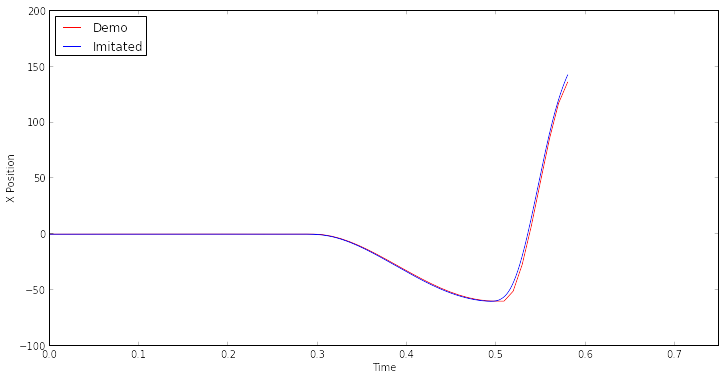

<function __main__.plotImitateScaleDmp>

In [32]:
interact(plotImitateScaleDmp, g=(-10, 200, 1), T=(0.1, 1.5, 0.1), y0=(-30, 30, 1))

##Perturbation robustness

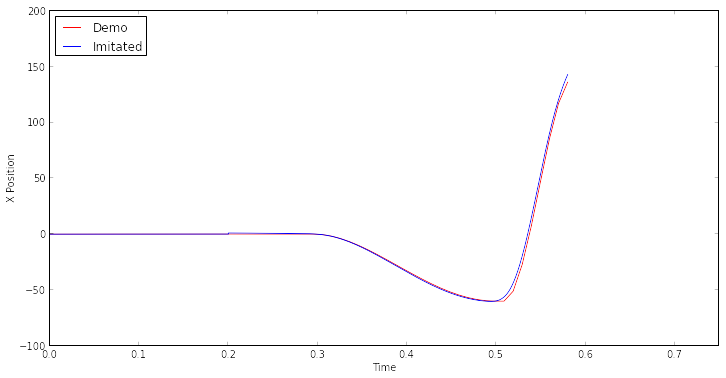

<function __main__.plotPerturbateDmp>

In [33]:
interact(plotPerturbateDmp, p_loc=(0.01, 0.5, 0.01), p_strength=(-200, 200, 1))

##Extension to multiple dimensions
* As long as the dimensions are independent
 * Use one Transformation System per dimension
 * Use the same Canonical System for all dimensions

##Extensions
* Oscillating movements
* Enforcing a goal velocity
* Obstacle avoidance
* Closed-loop perception-action control
* Movement synchroization
* Rotation Dmps (quaternion based and rotation matrix based)
* ...

##Recap
* Dmps are a toolbox to imitate movements and modify them on the fly
* Robust against perturbations
* Always converge to the goal in time
* Can be executed and modified in real-time
* Can be extended to multiple dimensions
* Can be extended using arbitrary coupling terms to achieve any desired behavior

##Recap
#### Parameters
* $\alpha_z$ and $\beta_z$ are constant $\rightarrow$ can be ignored
* $\alpha_s$ can be calculated automatically
* Good values for the parameters of $f$ can be found automatically
* The weights of $f$ can be learned from demonstration using locally weighted regression

##Examples


In [34]:
from IPython.display import YouTubeVideo
YouTubeVideo('Ge0GduY1rtE')

In [35]:
from IPython.display import YouTubeVideo
YouTubeVideo('SH3bADiB7uQ')  